## __Customizing Line Plot__

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)



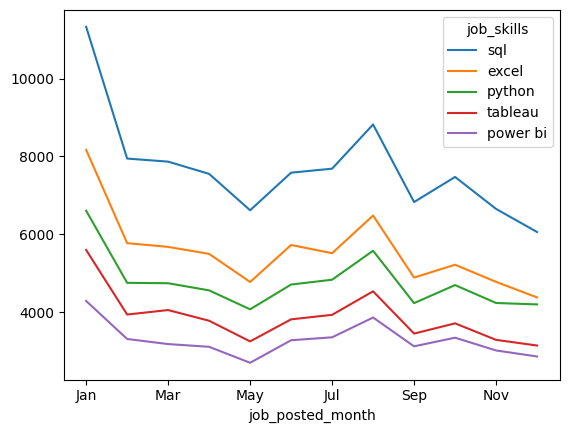

In [4]:
# Filter for Data Analyst
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

# Create a column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job skills column and pivot
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills',aggfunc='size',fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x :pd.to_datetime(x,format = '%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index("job_posted_month")
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Plotting all rows for first 5 columns
df_DA_pivot.iloc[: , :5].plot(kind='line')

plt.title('Top 5 skills for Data Analyst per month')
plt.ylabel("count")
plt.xlabel("")
plt.show()

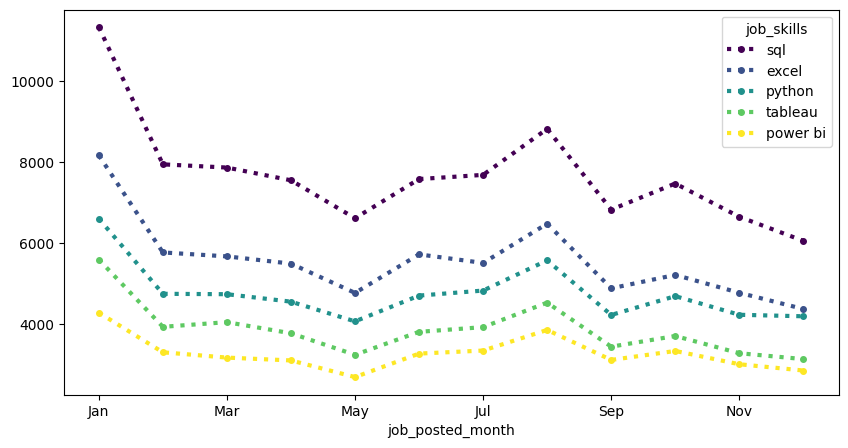

In [20]:
df_DA_pivot.iloc[:, :5].plot(kind='line',
                             linewidth=3,
                             linestyle=':',
                             colormap='viridis',
                             marker='o',
                             markersize=4,
                             figsize=(10,5))

plt.show()

## __Customizing Scatter Plot__

In [33]:
df_exploded = df.explode('job_skills')

# Calculate the avg salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

# Limit to the top skills 
skill_count = 15
skill_stats=skill_stats.sort_values(by='skill_count',ascending= False).head(skill_count)

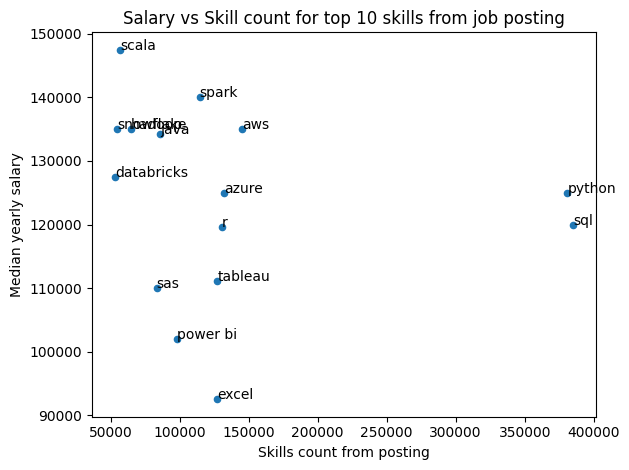

In [34]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Skills count from posting')
# plt.xlim(20000, 120000)
plt.ylabel('Median yearly salary')
# plt.ylim(122000, 142000)
plt.title("Salary vs Skill count for top 10 skills from job posting")
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],
             skill_stats['median_salary'].iloc[i], txt)
plt.tight_layout()
plt.show()

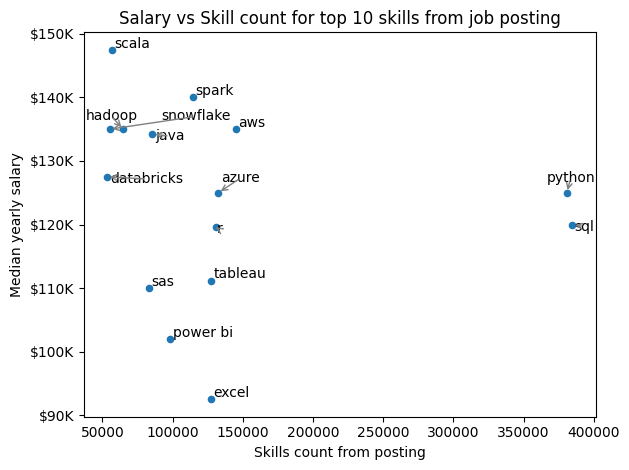

In [44]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],
             skill_stats['median_salary'].iloc[i], txt))
    
adjust_text(texts, arrowprops=dict(arrowstyle="->",color='gray',lw=1),
            expand_text=(1.5, 1.5),  # Increase expansion for text
            expand_points=(2, 2),  # Increase expansion for points
            force_text=(1.5, 1.5),  # Increase force to separate texts
            force_points=(1, 1),  # Increase force to separate points
            lim=100)  # Set limit for the number of iterations for adjustments

#to edit y-axis we need to get current axis by gca()
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
    
plt.xlabel('Skills count from posting')
# plt.xlim(20000, 120000)
plt.ylabel('Median yearly salary')
# plt.ylim(122000, 142000)
plt.title("Salary vs Skill count for top 10 skills from job posting")
plt.tight_layout()
plt.show()